In [36]:
# BASE -------------------------------
import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# VISUALIZATIONS ---------------------
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# STYLES & CONFIGURATIONS ------------
sns.set_theme(style='darkgrid')
seed(3)

In [18]:
# Generate univariate observations
data = 3 * randn(125) + 15

print('mean: %3f std: %3f' % (mean(data), std(data)))

mean: 15.440186 std: 2.911761


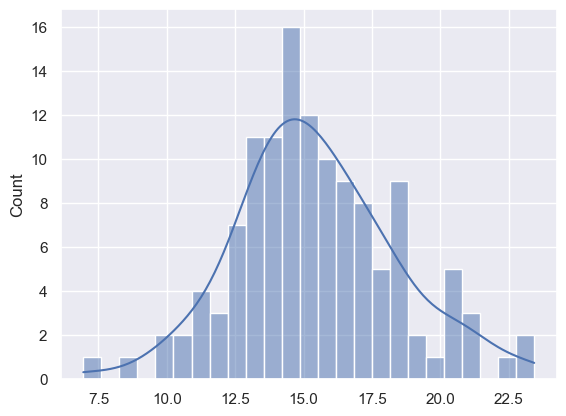

In [19]:
# plot
# plt.hist(data, density=True)
# sns.distplot(data, hist=True, kde=True, bins=25)
sns.histplot(data=data, kde=True, bins=25)
plt.show()
plt.savefig('Univariate_gaussian.png')

Text(0.5, 0.92, 'The Bivariate Normal Distribution')

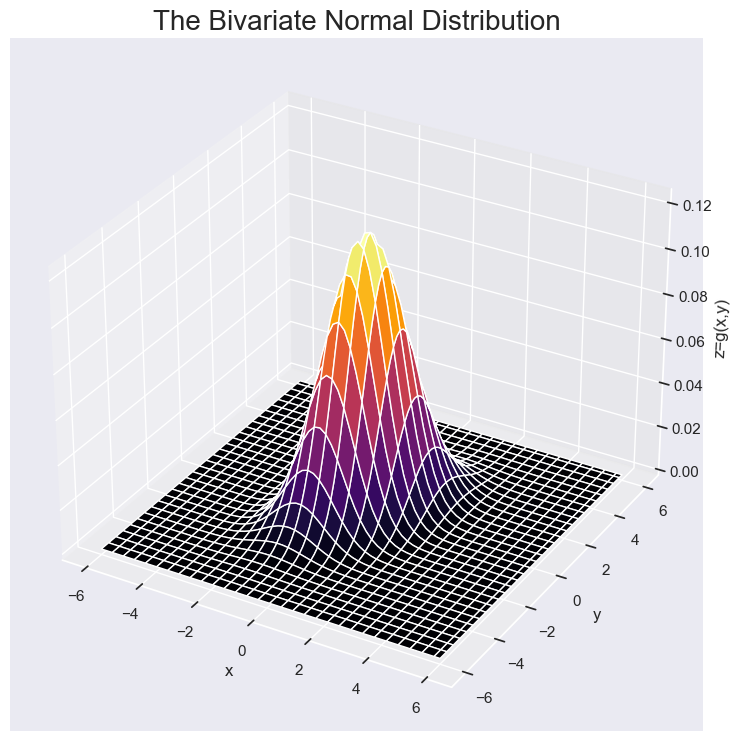

In [37]:
# Our 2-dimensional distribution will be over variables X and Y
n = 60 # number of grid points on each axis
X = np.linspace(-6, 6, n)
Y = np.linspace(-6, 6, n)
X, Y = np.meshgrid(X, Y)
# Stack X and Y into a single 3-dimensional array
position = np.empty(X.shape + (2,)) #this gives a tensor of shape (60,60,2)
position[:, :, 0] = X
position[:, :, 1] = Y

# Mean vector and covariance matrix
mu_1=0
mu_2=0
mu = np.array([mu_1, mu_2])
Sigma = np.array([[ 1 , 3/5], [3/5,  2]])

def multivariate_gaussian(position, mu, Sigma):
    
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**2 * Sigma_det) # this is the normalizing constant.
    fac = np.einsum('...k,kl,...l->...', position-mu, Sigma_inv, position-mu) # This einsum or Einstein sum 
    # calculates (u-mu)^T.Sigma^-1.(u-mu) in a vectorized way across all the input variables.

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y stacked into a position tensor.
Z = multivariate_gaussian(position, mu, Sigma)

# Create a surface plot
fig = plt.figure(figsize=(9,9))
picture = plt.axes(projection='3d')
#picture.plot_surface(X, Y, Z, cmap=cm.magma)
picture.plot_surface(X, Y, Z, cmap='inferno')
# set labels for axes
picture.set_xlabel('x')
picture.set_ylabel('y')
picture.set_zlabel('z=g(x,y)')
# set image title
picture.set_title('The Bivariate Normal Distribution', fontsize=20) 

In [ ]:
# save the figure
plt.savefig("Fig_bivariate_normal.png")

https://github.com/halanelson/Essential-Math-For-AI/blob/main/MyBook_Chp2_Uniform_and_Normal_Distribution.ipynb

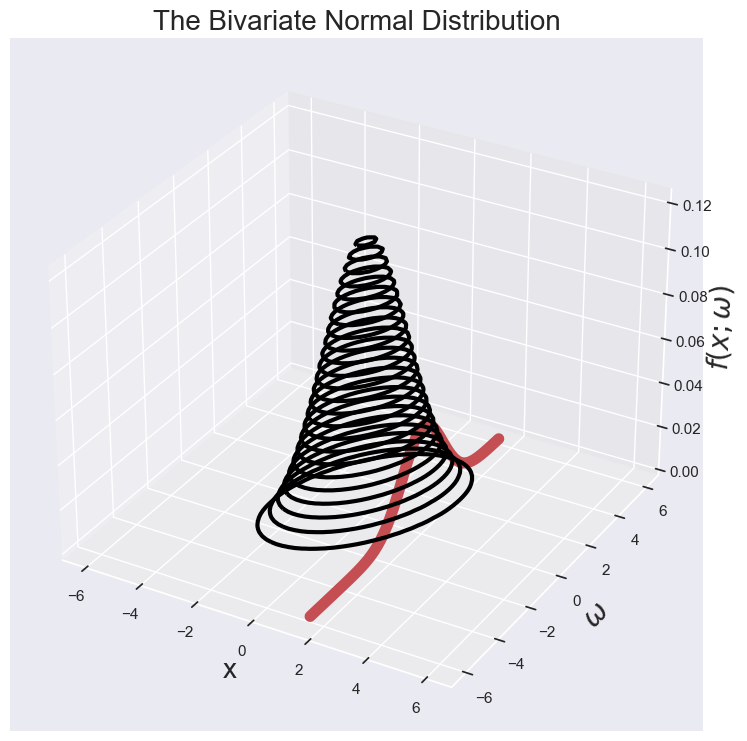

In [103]:
# Our 2-dimensional distribution will be over variables X and Y
n = 60 # number of grid points on each axis
x = np.linspace(-6, 6, n)
y = np.linspace(-6, 6, n)
X, Y = np.meshgrid(x, y)

# Stack X and Y into a single 3-dimensional array
position = np.empty(X.shape + (2,)) #this gives a tensor of shape (n,n,2)
position[:, :, 0] = X
position[:, :, 1] = Y

# Mean vector and covariance matrix
mu_1=0
mu_2=0
mu = np.array([mu_1, mu_2])
Sigma = np.array([[ 1 , 3/5], [3/5,  2]])

def multivariate_gaussian(position, mu, Sigma):
    
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**2 * Sigma_det) # this is the normalizing constant.
    fac = np.einsum('...k,kl,...l->...', position-mu, Sigma_inv, position-mu) # This einsum or Einstein sum 
    # calculates (u-mu)^T.Sigma^-1.(u-mu) in a vectorized way across all the input variables.

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y stacked into a position tensor.
Z = multivariate_gaussian(position, mu, Sigma)

# Create a surface plot
fig = plt.figure(figsize=(9,9))
picture = plt.axes(projection='3d')
# picture.plot_surface(X, Y, Z, cmap='inferno')
picture.contour3D(X, Y, Z,28,cmap=None, colors='black', linewidths=3) # commenting this line out gives 3d and slice

# set labels for axes
picture.set_xlabel('x', fontsize=20)
picture.set_ylabel('$\omega$', fontsize=20)
picture.set_zlabel('$f(x;\omega)$', fontsize=20)

# set image title
picture.set_title('The Bivariate Normal Distribution', fontsize=20) 

# Slice through the joint distribution
x1=X[:,37]
y1 = np.linspace(-6, 6, n)
z1=Z[:,37]
plt.plot(x1,y1,z1,'r',linewidth=8)

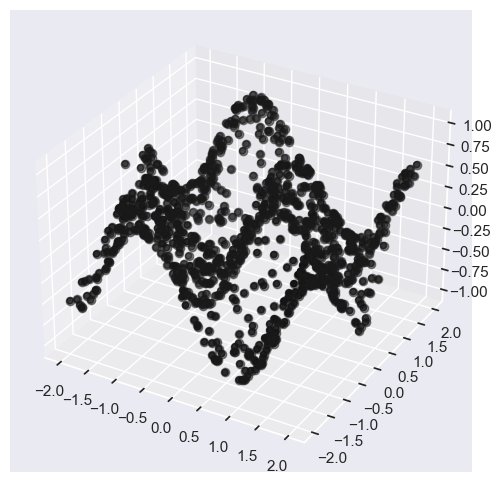

In [88]:
def f(x, y):                        
    return np.sin(2*x) * np.cos(2*y)

# data for the surface
x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
Z = f(X, Y)

# data for the scatter plot
xx = 4*np.random.rand(1000) - 2
yy = 4*np.random.rand(1000) - 2
zz = f(xx,yy)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter(xx, yy, zz, c='black', marker='o', cmap=None)
ax.plot(xx, yy, zz, 'ko',alpha=0.5) # note the 'ro' (no '-') and the alpha

# ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
#                 cmap='inferno', edgecolor='none')

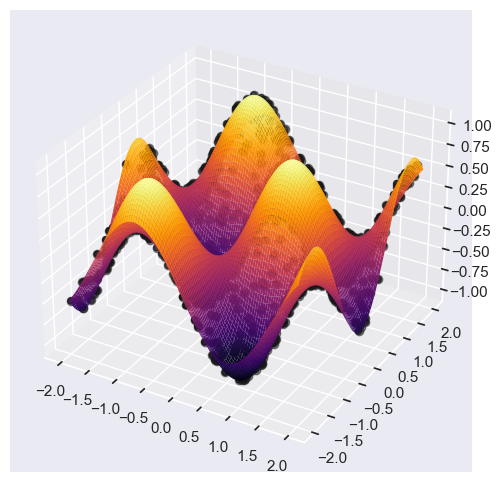

In [89]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter(xx, yy, zz, c='black', marker='o', cmap=None)
ax.plot(xx, yy, zz, 'ko',alpha=0.5) # note the 'ro' (no '-') and the alpha

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='inferno', edgecolor='none')